In [4]:
%pip install clean-text


  Using cached clean_text-0.6.0-py3-none-any.whl (11 kB)
  Using cached emoji-1.7.0.tar.gz (175 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached ftfy-6.1.1-py3-none-any.whl (53 kB)
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171059 sha256=c6231d382af8bd8196c4bcf0e9c3ce64b6f9f88eaed2f9d63908a71352c5b53d
  Stored in directory: c:\users\marku\appdata\local\pip\cache\wheels\33\40\c1\5469c4f03ddc90bb1bd797ef3b6fe7d0d29688155ee2c05529
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install nltk

%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
#################################### PACKAGES ######################################
import pandas as pd
from cleantext import clean
import re

import nltk
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import *


R = pd.read_csv("https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv") 


####################################### CLEANING ######################################
Copy_clean = R.copy()

def cleaningTime(x):
    clean_text = x.replace('|', '')
    clean_text = clean_text.replace('$', '')
    regex = r'[xX]+'
    clean_text = re.sub(regex, '', clean_text)
    # Replace date with DATE
    regex = r'\d{1,2}\/\d{1,2}\/\d{2,4}'
    clean_text = re.sub(regex, 'DATE', clean_text)
    clean_text = clean(clean_text,
        no_punct=True,
        lower=True,                    # lowercase text
        no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
        no_urls=True,                  # replace all URLs with a special token
        no_emails=True,                # replace all email addresses with a special token
        no_numbers=True,
        replace_with_url="url",
        replace_with_email="email",
        replace_with_number="number",
        )
    return clean_text

#R['content'].apply(cleaning)
Copy_clean['content'] = R['content'].apply(cleaningTime)
#print(Copy_clean['content'])

# (r'C:\Users\karen\nein.csv', index= None, header=True)
df = pd.DataFrame(Copy_clean)
df.to_csv('copy_clean.csv', index= None, header=True)


####################################### TOKENIZE #########################################
Copy_tok = Copy_clean.copy()

def Tokenize(x):     
    tokens = nltk.word_tokenize(x)
    return tokens

Copy_tok['content'] = Copy_tok['content'].apply(Tokenize)
print(Copy_tok['content'])

#Copy_stop = []
#for i in Copy_tok['content']:
    #tokens = nltk.word_tokenize(i)
    #Copy_stop.append(tokens)
#print(Copy_stop)

######################################## REMOVING STOPWORDS ################################
Copy_stop = Copy_tok.copy()
stop_words = set(stopwords.words('english'))
print("Stop words length: ", len(stop_words))
print("Stop words dictionary: ", (stop_words))
# removing
def Remove_stopwords(x): # x = Copy_tok['content']
    filtered_sentence = []
    for w in x:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence

Copy_stop['content'] = Copy_stop['content'].apply(Remove_stopwords)
#print(Copy_stop['content'])


######################################### STEMMING ##########################################
Copy_stemming = Copy_stop.copy()
stemmer = SnowballStemmer("english")

def Stemming_Words(x):
    stem_words = []
    for w in x:
        word = stemmer.stem(w)
        stem_words.append(word)
    return stem_words
Copy_stemming['content'] = Copy_stemming['content'].apply(Stemming_Words)
#print(Copy_stemming['content'])

##############################################################################################
# number of tokens before removing stopwords
def unique_words (file):
    UN = {}
    for row in file:
        for word in row:
            if word not in UN:
                UN[word] = 1
            else: 
                UN[word] += 1
    UN = dict(sorted(UN.items(), key = lambda kv: kv[1], reverse=True)) # Sorting the unique words after number of occurrences, from highest to lowest
    return len(UN)


# Difference between number of tokens before and after removing stopwords
print("Difference between number of tokens before and after removing stopwords: ", (unique_words(Copy_tok['content'])-unique_words(Copy_stop['content'])))

# number of tokens after tokenizing
print("Number of words after tokenizing: ", unique_words(Copy_tok['content']))

# number of tokens after removing stopwords
print("Number of words after removing stopwords: ", unique_words(Copy_stop['content']))

# reduction rate after removing stopwords
print("Reduction rate after removing stopwords: ", 100 - unique_words(Copy_stop['content'])/unique_words(Copy_tok['content']) * 100)

# number of tokens after stemming
print("Number of words after stemming: ", unique_words(Copy_stemming['content']))

# reduction rate after stemming
print("Reduction rate after stemming: ", 100 - unique_words(Copy_stemming['content'])/unique_words(Copy_stop['content']) * 100)

# Print copy_stemming (check how stemming works)
print(Copy_stemming['content'])



Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marku\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0      [sometimes, the, power, of, christmas, will, m...
1      [awakening, of, number, strands, of, dna, reco...
2      [never, hike, alone, a, friday, the, 13th, fan...
3      [when, a, rare, shark, was, caught, scientists...
4      [donald, trump, has, the, unnerving, ability, ...
                             ...                        
245    [prison, for, rahm, gods, work, and, many, oth...
246    [number, useful, items, for, your, tiny, home,...
247    [former, cia, director, michael, hayden, said,...
248    [antonio, sabato, jr, says, hollywoods, libera...
249    [former, us, president, bill, clinton, on, mon...
Name: content, Length: 250, dtype: object
Stop words length:  179
Stop words dictionary:  {'myself', "mustn't", 'once', 'ourselves', 'above', 'too', 'should', 'been', 'from', 'than', 'no', 'having', "you've", 'haven', 'why', 'him', 'isn', 'just', 'do', 'if', 'don', 'o', 'the', 'shan', 'up', 'my', 'yourselves', 'for', 'any', 'both', "wasn't", 'these', 'few', 'doesn', 'are

Notes:

* The URLs are not correctly formatted: Each URL includes the first word in the content!!!
* Not sure whether the counts below are done in the right order
* Regarding dates: We need to choose which column to use: (1) scraped_at, (2) inserted_at, (3) updated_at
* Insert more "replace" statements in CleaningTime (i.e. DATE)

In [6]:
# Count URLs
count_url = 0
for i in Copy_stemming['content']:
    for x in i:
        if x == 'url':
            count_url += 1
        else:
            count_url = count_url
print("Number of URLs: ", count_url)

# Count dates
count_date = 0
for i in Copy_stemming['content']:
    for x in i:
        if x == 'date':
            count_date += 1
        else:
            count_date = count_date
print("Number of dates: ", count_date)

# Count numbers (numeric values)
count_number = 0
for i in Copy_stemming['content']:
    for x in i:
        if x == 'number':
            count_number += 1
        else:
            count_number = count_number
print("Number of numeric values: ", count_number)

# Count punctuation: check if punctuations are removed
count_punct = 0
for i in Copy_stemming['content']:
    for x in i:
        if x == 'punct':
            count_punct += 1
        else:
            count_punct = count_punct
print("Number of punctuations (check): ", count_punct)

Number of URLs:  242
Number of dates:  27
Number of numeric values:  2019
Number of punctuations (check):  0


100 most frequent words:  ['number', 'one', 'us', 'like', 'time', 'peopl', 'state', 'trump', 'use', 'would', 'market', 'year', 'also', 'new', 'blockchain', 'make', 'url', 'think', 'thing', 'said', 'report', 'go', 'way', 'mani', 'net', 'govern', 'even', 'nation', 'take', 'get', 'see', 'presid', 'could', 'come', 'work', 'say', 'stock', 'american', 'two', 'world', 'may', 'need', 'first', 'right', 'day', 'life', 'power', 'want', 'look', 'help', 'countri', 'well', 'includ', 'bitcoin', 'feel', 'fact', 'person', 'war', 'bank', 'obama', 'good', 'search', 'back', 'headlin', 'sourc', 'much', 'call', 'part', 'support', 'ece', 'polici', 'point', 'dont', 'law', 'know', 'last', 'system', 'clinton', 'live', 'follow', 'secur', 'research', 'polit', 'realli', 'continu', 'russia', 'product', 'money', 'free', 'question', 'high', 'long', 'end', 'compani', 'chang', 'public', 'import', 'global', 'industri', 'event']


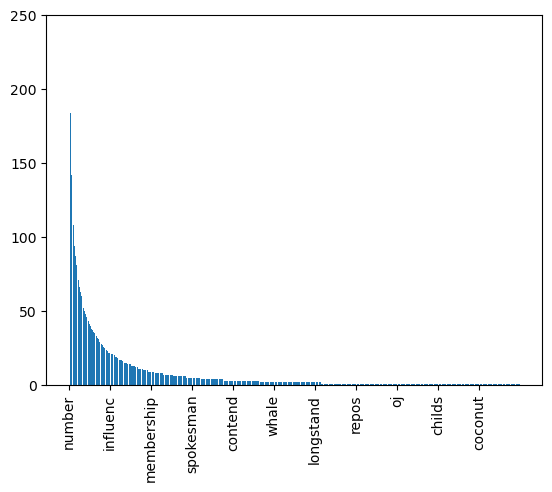

In [15]:
import matplotlib.pyplot as plt

# Determine 100 most frequent words in in content column
def most_frequent_words (file):
    UN = {}
    for row in file:
        for word in row:
            if word not in UN:
                UN[word] = 1
            else: 
                UN[word] += 1
    UN = dict(sorted(UN.items(), key = lambda kv: kv[1], reverse=True)) # Sorting the unique words after number of occurrences, from highest to lowest
    return list(UN.keys())[:100]

print("100 most frequent words: ", most_frequent_words(Copy_stemming['content']))

# Plot the frequency of the 10000 most frequent words with a bar plot. Use every 1000th word as a label on the x-axis.
def plot_most_frequent_words(file):
    UN = {}
    for row in file:
        for word in row:
            if word not in UN:
                UN[word] = 1
            else: 
                UN[word] += 1
    UN = dict(sorted(UN.items(), key = lambda kv: kv[1], reverse=True))
    plt.bar(range(len(UN)), list(UN.values()), align='center')
    
    # Only label every 1000th word on the x-axis
    plt.xticks(range(0, len(UN), 1000), list(UN.keys())[::1000], rotation='vertical')
    
    # Rescale the y-axis to improve visualization
    plt.ylim(0, 250)
    
    plt.show()

plot_most_frequent_words(Copy_stemming['content'])